Group 6 - Final Project

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Dhrumit Patel/College/3402 - Semester 5/COMP 258 - Neural Networks/Project/normalized_student_data.csv', header=0)

new_column_names = {
    "First Term Gpa' numeric": "First Term Gpa",
    "Second Term Gpa' numeric": "Second Term Gpa",
    "First Language' numeric": "First Language",
    " Funding numeric": "Funding",
    "School numeric": "School",
    "FastTrack numeric": "FastTrack",
    "Coop numeric": "Coop",
    " Residency numeric": "Residency",
    "Gender numeric": "Gender",
    "Previous Education' numeric": "Previous Education",
    "Age Group' numeric": "Age Group",
    "High School Average Mark' numeric": "High School Average Mark",
    "Math Score' numeric": "Math Score",
    "English Grade' numeric": "English Grade",
    "FirstYearPersistence {1,0}": "FirstYearPersistence"
}

df = df.rename(columns=new_column_names)
df.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding',
       'School', 'FastTrack', 'Coop', 'Residency', 'Gender',
       'Previous Education', 'Age Group', 'High School Average Mark',
       'Math Score', 'English Grade', 'FirstYearPersistence'],
      dtype='object')

In [3]:
# Checking for null values in each column
null_values = df.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
First Term Gpa              0
Second Term Gpa             0
First Language              0
Funding                     0
School                      0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous Education          0
Age Group                   0
High School Average Mark    0
Math Score                  0
English Grade               0
FirstYearPersistence        0
dtype: int64


In [4]:
# Printing distinct values in each column
distinct_values = df.apply(lambda x: x.nunique())
print("\nDistinct Values:")
print(distinct_values)


Distinct Values:
First Term Gpa              692
Second Term Gpa             717
First Language                3
Funding                       6
School                        1
FastTrack                     2
Coop                          2
Residency                     2
Gender                        3
Previous Education            3
Age Group                     8
High School Average Mark     64
Math Score                   43
English Grade                 8
FirstYearPersistence          2
dtype: int64


In [5]:
# Printing the column names, number of unique values and count of unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print()

Column 'First Term Gpa' has 692 unique value(s):
[0.       2.5      4.25     3.020833 4.275    4.357143 2.210526 2.045455
 4.285714 2.863636 2.75     2.125    1.46     4.421053 3.791667 3.717391
 4.233333 3.413043 3.375    3.785714 3.58     3.086957 4.5      3.6
 3.425    3.770833 2.071429 2.55     3.782609 3.979167 2.645833 3.065217
 1.6      4.225    3.595238 3.82     3.928571 2.565217 2.52381  4.309524
 3.865385 2.05     3.47619  3.304348 1.105263 2.23913  3.54     3.526316
 1.78     4.38     3.027778 2.309524 2.875    3.826087 3.32     3.456522
 2.695652 3.06     3.277778 0.2      2.94     1.857143 3.804348 4.065217
 1.526316 1.710526 2.956522 2.157895 4.02381  1.975    0.4375   3.925
 2.571429 3.4      3.521739 0.543478 2.369565 3.347826 3.880952 1.541667
 3.56     0.157895 3.854167 2.58     3.882353 4.217391 3.354167 2.928571
 3.452381 3.068182 3.818182 1.230769 3.916667 1.176471 2.275    3.875
 1.568182 4.434783 2.416667 1.59375  2.304348 3.5      4.095238 3.083333
 4.261905 4.2

In [6]:
# Printing the count, mean, std, min, max for the columns
df.describe()

,First Term Gpa,Second Term Gpa,First Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
count,1437.000000,1437.000000,1437.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,2.812403,2.506169,1.840640,2.926931,6.0,1.741823,1.695198,1.406402,1.774530,1.274182,2.632568,77.590814,37.522617,8.060543,0.791928
std,1.208001,1.385418,0.986153,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,0.567193,1.419619,8.397481,11.394988,1.697477,0.406070
min,0.000000,0.000000,1.000000,1.000000,6.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,17.000000,6.000000,1.000000,0.000000
25%,2.210526,1.740000,1.000000,2.000000,6.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,78.000000,27.000000,7.000000,1.000000
50%,3.086957,2.847826,1.000000,2.000000,6.0,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,78.000000,42.000000,9.000000,1.000000
75%,3.738095,3.590909,3.000000,4.000000,6.0,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,78.000000,48.000000,9.000000,1.000000
max,4.500000,4.500000,3.000000,9.000000,6.0,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,108.000000,50.000000,10.000000,1.000000


In [7]:
# Dropped because school column has only one value that is 6
df = df.drop(columns='School')
df.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Language', 'Funding',
       'FastTrack', 'Coop', 'Residency', 'Gender', 'Previous Education',
       'Age Group', 'High School Average Mark', 'Math Score', 'English Grade',
       'FirstYearPersistence'],
      dtype='object')

In [8]:
# Mapping english grade and funding column to organize values and make it in order
english_grade_mapping = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    7: 5,
    8: 6,
    9: 7,
    10:8
}

df['English Grade'] = df['English Grade'].map(english_grade_mapping)

In [9]:
funding_mapping ={
    1: 1,
    2: 2,
    4: 3,
    5: 4,
    8: 5,
    9: 6
}

df['Funding'] = df['Funding'].map(funding_mapping)

In [10]:
# Checking the mapping of the above updated columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print()


Column 'First Term Gpa' has 692 unique value(s):
[0.       2.5      4.25     3.020833 4.275    4.357143 2.210526 2.045455
 4.285714 2.863636 2.75     2.125    1.46     4.421053 3.791667 3.717391
 4.233333 3.413043 3.375    3.785714 3.58     3.086957 4.5      3.6
 3.425    3.770833 2.071429 2.55     3.782609 3.979167 2.645833 3.065217
 1.6      4.225    3.595238 3.82     3.928571 2.565217 2.52381  4.309524
 3.865385 2.05     3.47619  3.304348 1.105263 2.23913  3.54     3.526316
 1.78     4.38     3.027778 2.309524 2.875    3.826087 3.32     3.456522
 2.695652 3.06     3.277778 0.2      2.94     1.857143 3.804348 4.065217
 1.526316 1.710526 2.956522 2.157895 4.02381  1.975    0.4375   3.925
 2.571429 3.4      3.521739 0.543478 2.369565 3.347826 3.880952 1.541667
 3.56     0.157895 3.854167 2.58     3.882353 4.217391 3.354167 2.928571
 3.452381 3.068182 3.818182 1.230769 3.916667 1.176471 2.275    3.875
 1.568182 4.434783 2.416667 1.59375  2.304348 3.5      4.095238 3.083333
 4.261905 4.2

In [11]:
# Seperating columns for One-Hot Encoding
columns_to_encode = [
    'First Language', 'Funding', 'Gender', 'Previous Education', 
    'Age Group', 'English Grade', 'FastTrack', 'Coop', 
    'Residency', 'FirstYearPersistence'
]

# Identifying the columns to scale
columns_to_scale = [col for col in df.columns if col not in columns_to_encode]

In [12]:
# Applying One-Hot Encoding to categorical column and StandardScalar to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), columns_to_scale),
        ('categorical', OneHotEncoder(), columns_to_encode)
    ]
)

In [13]:
# Transforming the data by fitting into the pipeline
processed_data = preprocessor.fit_transform(df)

# Getting the new column names after One-Hot Encoding
column_categorical_names = preprocessor.named_transformers_['categorical'].get_feature_names_out(columns_to_encode)

# Creating an array to combine the arrays
combined_array = []

# Adding elements from the original arrays to the combined array
combined_array[:4] = columns_to_scale
combined_array[4:] = column_categorical_names

# Converting the preprocessed data back into dataframe with the new column names
processed_df = pd.DataFrame(processed_data, columns=combined_array)

In [15]:
# Splitting the dataset into X and y
X = processed_df.drop(columns=['FirstYearPersistence_0', 'FirstYearPersistence_1'])
y = processed_df.iloc[:, -2:]
X.columns, y.columns

(Index(['First Term Gpa', 'Second Term Gpa', 'High School Average Mark',
        'Math Score', 'First Language_1', 'First Language_2',
        'First Language_3', 'Funding_1', 'Funding_2', 'Funding_3', 'Funding_4',
        'Funding_5', 'Funding_6', 'Gender_1', 'Gender_2', 'Gender_3',
        'Previous Education_0', 'Previous Education_1', 'Previous Education_2',
        'Age Group_1', 'Age Group_2', 'Age Group_3', 'Age Group_4',
        'Age Group_5', 'Age Group_6', 'Age Group_7', 'Age Group_8',
        'English Grade_1', 'English Grade_2', 'English Grade_3',
        'English Grade_4', 'English Grade_5', 'English Grade_6',
        'English Grade_7', 'English Grade_8', 'FastTrack_1', 'FastTrack_2',
        'Coop_1', 'Coop_2', 'Residency_1', 'Residency_2'],
       dtype='object'),
 Index(['FirstYearPersistence_0', 'FirstYearPersistence_1'], dtype='object'))

In [16]:
# Using StratifiedShuffleSplit to split into train and test sets
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Generating shuffled indices for splitting
for train_index, test_index in strat_shuff_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Displaying the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1005, 41)
X_test shape: (432, 41)
y_train shape: (1005, 2)
y_test shape: (432, 2)


In [17]:
# Defining and building the sequential model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
# Added dropout to handle overfitting in the model
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Printing out the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5376      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [18]:
# Define the learning rate
learning_rate = 0.01

# Create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the customized optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
32/32 [==============================] - 1s 8ms/step - loss: 0.4158 - accuracy: 0.8567 - val_loss: 0.2930 - val_accuracy: 0.9028
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3293 - accuracy: 0.8826 - val_loss: 0.2677 - val_accuracy: 0.8981
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3055 - accuracy: 0.9015 - val_loss: 0.2718 - val_accuracy: 0.8981
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3109 - accuracy: 0.9005 - val_loss: 0.2764 - val_accuracy: 0.9005
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.3020 - accuracy: 0.8985 - val_loss: 0.2973 - val_accuracy: 0.8935
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9095 - val_loss: 0.3140 - val_accuracy: 0.9005
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2734 - accuracy: 0.9035 - val_loss: 0.3364 - val_accuracy: 0.8866
Epoch 8/50
32/32 [==

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

14/14 [==============================] - 0s 923us/step - loss: 0.7462 - accuracy: 0.8773
Test accuracy: 87.73%


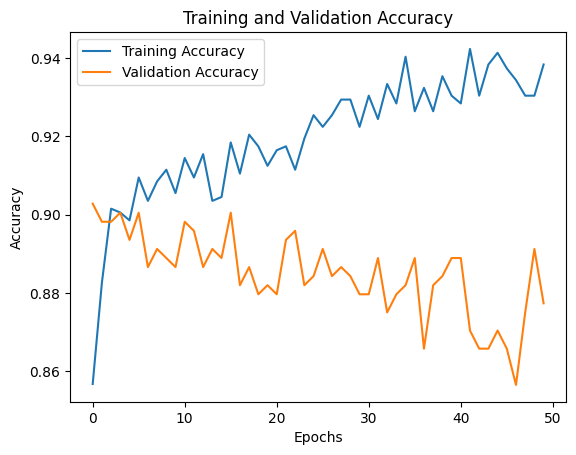

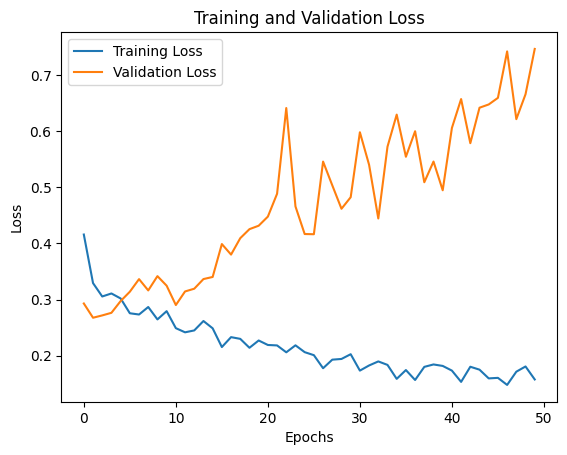

In [20]:
# Plotting training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Hyperparameter tuning

# Function to create a model
def create_model(optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train the model and evaluate its performance
def checkout(opt, lr, ep, bs):
    model2 = create_model(opt, lr)
    model2.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_test, y_test))
    test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
    print(f"Test Accuracy for {opt}, {lr}, {ep}, {bs}: {test_accuracy2 * 100:.2f}%")
    return test_accuracy2

# Calling the checkout function with specified parameters
checkout('adam', 0.01, 10, 32)

In [ ]:
# Defining the possible grid for hyperparameter tuning
optimizers = ['adam', 'sgd', 'rmsprop']
learning_rates = [0.001, 0.01, 0.1]
epochs = [10, 20, 30]
batch_sizes = [32, 64, 128]

# Initializing lists to store the parameter combinations and its accuracy
parameter_combinations = []
accu = []

# Loooping to generate the all possible combinations of parameters
for opt in optimizers:
    for lr in learning_rates:
        for ep in epochs:
            for bs in batch_sizes:
                parameter_combinations.append((opt, lr, ep, bs))

# Print the parameter combinations and their corresponding accuracies
for params in parameter_combinations:
    print(f"Optimizer: {params[0]}, Learning Rate: {params[1]}, Epochs: {params[2]}, Batch Size: {params[3]}")
    t = checkout(params[0], params[1], params[2], params[3])
    accu.append(t)
    print("\n")

In [ ]:
# Calculating and printing out the maximum accuracy
max_accuracy = max(accu)
print(f"Maximum Test Accuracy: {max_accuracy * 100:.2f}%")

# Finding the index od the combination with highest accuracy
np.argmax(accu)

# Printing the combination of parameters with highest accuracy
max_index = parameter_combinations[64]
print(f"The maximum index pair of parameters is: {max_index}")

In [ ]:
# Running the model with the best hyperparamters
new_model = create_model('rmsprop',0.01)
history_new = new_model.fit(X_train, y_train, epochs = 10,batch_size=64, validation_data=(X_test,y_test))

# Evaluating the model by calculating test accuracy with the best hyperparamters got
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test accuracy after tuning: {test_accuracy * 100:.2f}%")

In [ ]:
# Saving the model
new_model.save('best_model_nn.h5')

In [ ]:
# Loading the best model and printing out the testing accuracy
best_model = load_model("best_model_nn.h5")
test_loss, test_accuracy= best_model.evaluate(X_test, y_test)
print(f"Test accuracy of best model: {test_accuracy * 100:.2f}%")

# Fitting it to plot the graphs of the accuracy and the loss
history_best = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [ ]:
# After hyperparmater tuning
# Plotting training and validation accuracy of best model
plt.plot(history_best.history['accuracy'], label='Training Accuracy')
plt.plot(history_best.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy of best_model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss of best model
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of best_model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()